In [71]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## 1. Prétraitement des données

Télécharger fashion mnist de la bibliothèque Keras.Datasets.

In [72]:
#-
mnist = keras.datasets.fashion_mnist

Comment sont codées les données, de quel type sont-elles. Quelle est la forme des données, taille des données d'entrée et des targets pour le train et test.

In [73]:
    
"""
    Les données sont codées en format d'image 28x28 pixels, avec des valeurs de pixel allant de 0 à 255.
    Les données d'entrée sont de type entier (uint8) et les targets sont des étiquettes de classe (0 à 9) représentant les différentes catégories de vêtements.
    La forme des données d'entrée est (60000, 28, 28) pour l'ensemble d'entraînement et (10000, 28, 28) pour l'ensemble de test. Les targets ont une forme de (60000,) pour l'entraînement et (10000,) pour le test.
"""
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Forme des données d'entraînement :", x_train.shape)
print("Forme des targets d'entraînement :", y_train.shape)
print("Forme des données de test :", x_test.shape)
print("Forme des targets de test :", y_test.shape)  

Forme des données d'entraînement : (60000, 28, 28)
Forme des targets d'entraînement : (60000,)
Forme des données de test : (10000, 28, 28)
Forme des targets de test : (10000,)


Comment se répartissent les targets au sein des deux jeux de données. Cette répartition est-elle cohérente pour les modèles d'apprentissage.

In [74]:
pd.DataFrame(y_train).value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [75]:
pd.DataFrame(y_test).value_counts()

0
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64

**Targets parfaitement équilibrées : chacun ont 6k pour le train et 1k pour le test.**

Quels traitements doivent être appliqués à ces données pour un traitement par un réseau de neurones. Expliquez pourquoi faire ces prétraitements.

In [76]:
# Il faut normaliser les données d'entrée
# les valeurs seront comprises entre 0 et 1. 
# Conseillé pour éviter les problèmes de mise à jour de poids, de convergence, etc.

# Il faut ensuite aplatir les données d'entrée pour les rendre compatibles avec un réseau de neurones dense (fully connected).

# Il faut faire du one hot encoding sur les targets pour les rendre compatibles avec une fonction de perte de type catégorielle (categorical crossentropy).

Qu'aurait-il fallu faire si la répartition était déséquilibrée.

**On aurait pu, par exemple, dupliquer les données qui ont des targets moins fréquentes pour équilibrer les classes.**

Créer la liste des targets, correspondant aux données suivantes : T-shirts, Pantalons, Pulls, Robes, Manteaux, Sandales, Chemises, Baskets, Sacs, Bottines.

In [77]:
labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Afficher les neuf premières entrées avec le nom de leur target.

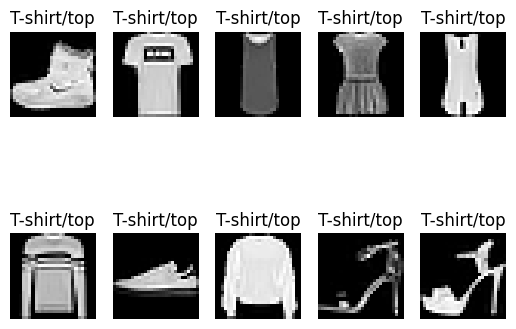

In [78]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(labels_dict[int(np.argmax(y_train[i]))])
    plt.axis('off')  # permet juste de ne pas afficher les axes

Transformer vos données afin qu'elles puissent être traitées correctement par un réseau de neurones.

In [79]:
# - Normalisation
X_train = X_train / 255.0
X_test = X_test / 255.0

# - Aplatir les images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# - hot one encoding des targets
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## 2. Création d'un premier modèle

De quel type doit être la couche de sortie (nombre de neurones, fonction d'activation).

**La couche de sortie possède 10 neurones (un pour chaque classe) et une fonction d'activation softmax car la fonction permet d'avoir une valeur entre 0 et 1 pour chaque neurone, ce qui correspond à une probabilité d'appartenance à chaque classe. La somme de ces probas permettra plus tard de faire une cross entropy pour calculer l'erreur.**

On souhaite créer un premier modèle avec simplement deux couches cachées identiques de même taille (256 neurones) et avec des fonctions d'activation de type relu.

In [80]:
model = Sequential([
    Input(shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Combien y-a-t-il de poids (paramètres) à caler. Détaillez les nombres de poids obtenus par couches et par neurones.

**Il y a 269322 paramètres à caler. 256\*28\*28+256=200960 pour la première couche, 256\*256+256=65792 pour la deuxième couche, 256\*10+10=2570 pour la troisième couche.**

Quel est selon vous les meilleurs paramètres pour la fonction compile. Donnez petite explication pour les trois paramètres (fonction de perte, fonction d'apprentissage, mesure de la qualité du réseau).

In [81]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- **On utilise l'algorithme de descente de gradient Adam car c'est le meilleur pour ce type de problème simple.**

- **La fonction de perte est la cross entropy car c'est la plus adaptée pour un problème de classification avec softmax (calculer le log de la probabilité de la classe réelle qui est entre 0 (exclu) et 1).**

- **La métrique est l'accuracy car c'est la plus adaptée pour un problème de classification (simplement calculer le nombre de bonnes classifications sur le nombre total de classifications).**

Si l'on souhaite mettre à jour nos poids moins de 200 fois en ayant un pourcentage de validation de 20%, quelle est la taille des batchs.

>$60000 \times 0.8 = 48000$ exemples pour le training

>Donc pour avoir moins de 200 itérations :

>$\frac{48000}{batch\_size} < 200 \implies batch\_size > \frac{48000}{200} = 240$

Entrainez le modèle sur 20 epochs, avec les paramètres précédents (batchs et pourcentage de validation).

In [82]:
history = model.fit(X_train, y_train, epochs=20, batch_size=240, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8039 - loss: 0.5674 - val_accuracy: 0.8465 - val_loss: 0.4319
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8571 - loss: 0.3973 - val_accuracy: 0.8604 - val_loss: 0.3847
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8739 - loss: 0.3466 - val_accuracy: 0.8690 - val_loss: 0.3589
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8864 - loss: 0.3160 - val_accuracy: 0.8712 - val_loss: 0.3543
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8910 - loss: 0.2975 - val_accuracy: 0.8742 - val_loss: 0.3423
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8949 - loss: 0.2827 - val_accuracy: 0.8816 - val_loss: 0.3283
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9045 - loss: 0.2599 - val_accuracy: 0.8799 - val_loss: 0.3348
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9062 - loss: 0.2503 - val_accur

Affichez maintenant le taux d'erreur sur le test et la validation. Que constatez-vous, pensez-vous que pour notre réseau il soit judicieux de faire plus de 20 epochs.

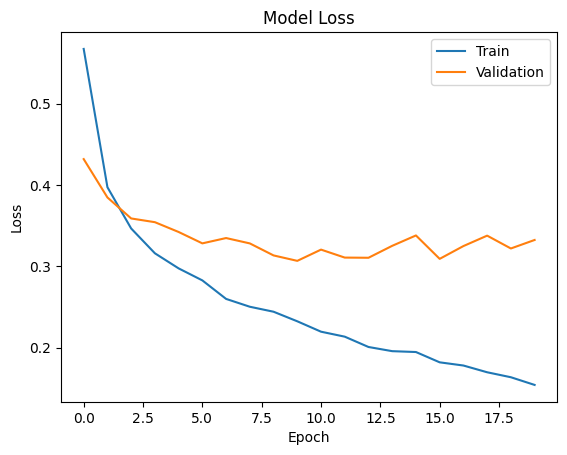

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Il n'est pas judicieux de faire plus de 20 epochs (voir plus de 10 epochs) car :**

>- La courbe de train loss continue de diminuer (elle apprend par coeur les données d'entraînement)
>- La courbe de validation loss commence à stagner puis augmenter après 10 epochs (overfitting)

## 3. Modification du modèle

Ajoutez maintenant une troisième couche cachée identique aux précédentes, et effectuer un nouvel apprentissage.

In [84]:
model_3layers = Sequential([
    Input(shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model_3layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3layers = model_3layers.fit(X_train, y_train, epochs=20, batch_size=240, validation_split=0.2, verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8040 - loss: 0.5598 - val_accuracy: 0.8543 - val_loss: 0.4088
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8627 - loss: 0.3790 - val_accuracy: 0.8559 - val_loss: 0.3835
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8780 - loss: 0.3328 - val_accuracy: 0.8733 - val_loss: 0.3504
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8875 - loss: 0.3079 - val_accuracy: 0.8749 - val_loss: 0.3382
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8930 - loss: 0.2878 - val_accuracy: 0.8781 - val_loss: 0.3344
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8978 - loss: 0.2742 - val_accuracy: 0.8784 - val_loss: 0.3375
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9034 - loss: 0.2578 - val_accuracy: 0.8897 - val_loss: 0.3123
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9089 - loss: 0.2442 - val_accu

Affichez les taux d'erreurs sur les parties test et validation. Que constatez-vous par rapport au modèle à deux couches cachées. Est-il judicieux d'ajouter cette nouvelle couche.

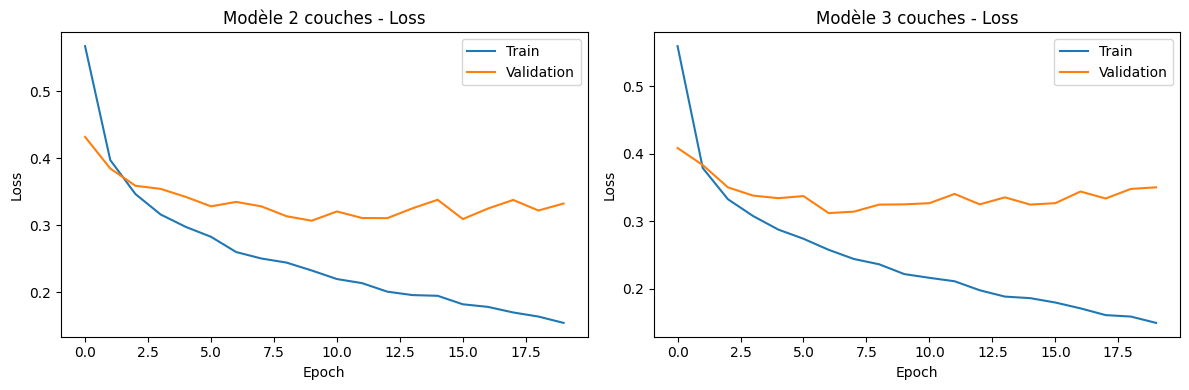

Modèle 2 couches - Test loss et accuracy:
Loss: 0.3531, Accuracy: 0.8911

Modèle 3 couches - Test loss et accuracy:
Loss: 0.3754, Accuracy: 0.8862


In [85]:
plt.figure(figsize=(12, 4))

# Modèle 2 couches
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Modèle 2 couches - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Modèle 3 couches
plt.subplot(1, 2, 2)
plt.plot(history_3layers.history['loss'], label='Train')
plt.plot(history_3layers.history['val_loss'], label='Validation')
plt.title('Modèle 3 couches - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Évaluation sur le test
print("Modèle 2 couches - Test loss et accuracy:")
test_loss_2, test_acc_2 = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {test_loss_2:.4f}, Accuracy: {test_acc_2:.4f}")

print("\nModèle 3 couches - Test loss et accuracy:")
test_loss_3, test_acc_3 = model_3layers.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {test_loss_3:.4f}, Accuracy: {test_acc_3:.4f}")

Reprenez le modèle à deux couches cachées et divisez le nombre de neurones par deux. Les résultats sont-ils dégradés.

In [86]:
model_2layers_128 = Sequential([
    Input(shape=(28*28,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_2layers_128.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2layers_128 = model_2layers_128.fit(X_train, y_train, epochs=20, batch_size=240, validation_split=0.2, verbose=1)

# Évaluation sur le test
print("Modèle 2 couches avec 256 neurones - Test accuracy:")
print(f"Accuracy: {test_acc_2:.4f}")

print("\nModèle 2 couches avec 128 neurones - Test accuracy:")
test_loss_128, test_acc_128 = model_2layers_128.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {test_acc_128:.4f}")

print(f"\nDégradation: {(test_acc_2 - test_acc_128)*100:.2f}%")

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7881 - loss: 0.6231 - val_accuracy: 0.8441 - val_loss: 0.4433
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8539 - loss: 0.4116 - val_accuracy: 0.8623 - val_loss: 0.3870
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8673 - loss: 0.3707 - val_accuracy: 0.8723 - val_loss: 0.3660
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8767 - loss: 0.3394 - val_accuracy: 0.8668 - val_loss: 0.3737
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8809 - loss: 0.3254 - val_accuracy: 0.8745 - val_loss: 0.3484
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8898 - loss: 0.3015 - val_accuracy: 0.8767 - val_loss: 0.3406
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8909 - loss: 0.2948 - val_accuracy: 0.8817 - val_loss: 0.3288
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9002 - loss: 0.2754 - val_accu

Sur la base d'un modèle à deux couches cachées avec 256 et 128 neurones, ajoutez des couches de dropout après chacune de ces deux couches avec un taux de désactivation de 40%. (model M)

In [87]:
# Model M avec Dropout
model_M = Sequential([
    Input(shape=(28*28,)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model_M.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_M.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Effectuer l'apprentissage et affichez à nouveau les courbes des taux d'erreurs. Que peut-on en conclure.

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7274 - loss: 0.7661 - val_accuracy: 0.8313 - val_loss: 0.4620
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8219 - loss: 0.4989 - val_accuracy: 0.8461 - val_loss: 0.4077
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8416 - loss: 0.4465 - val_accuracy: 0.8517 - val_loss: 0.3936
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8510 - loss: 0.4157 - val_accuracy: 0.8689 - val_loss: 0.3638
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8557 - loss: 0.3964 - val_accuracy: 0.8707 - val_loss: 0.3559
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8616 - loss: 0.3818 - val_accuracy: 0.8738 - val_loss: 0.3479
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8655 - loss: 0.3711 - val_accuracy: 0.8774 - val_loss: 0.3395
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8685 - loss: 0.3602 - val_accu

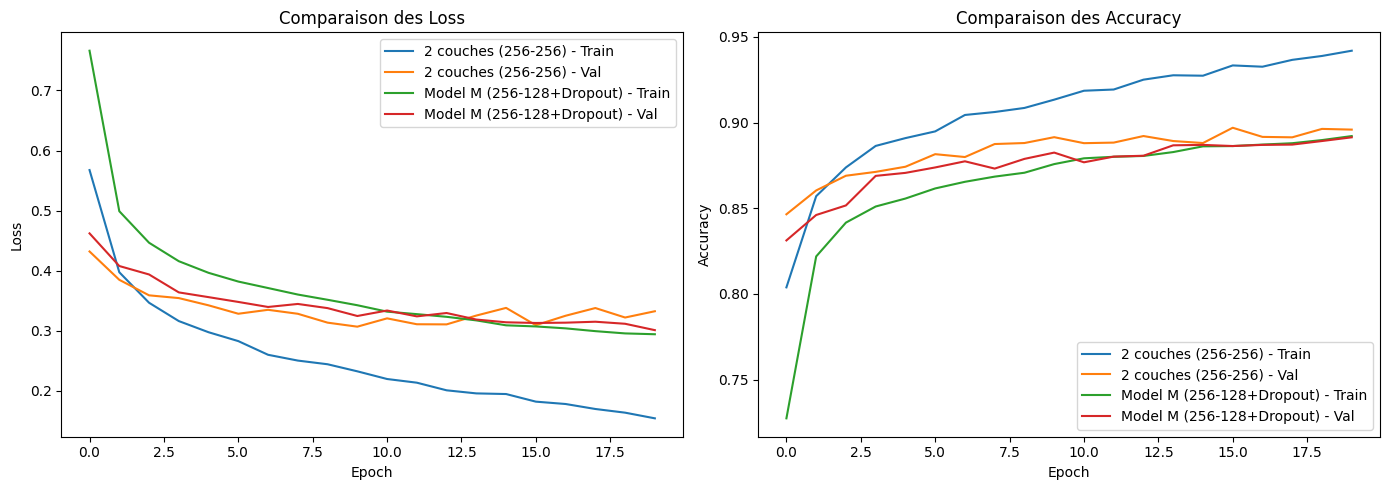

Modèle sans Dropout - Test accuracy: 0.8911
Modèle M avec Dropout - Test accuracy: 0.8836


In [88]:
history_M = model_M.fit(X_train, y_train, epochs=20, batch_size=240, validation_split=0.2, verbose=1)

plt.figure(figsize=(14, 5))

# Courbes de loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='2 couches (256-256) - Train')
plt.plot(history.history['val_loss'], label='2 couches (256-256) - Val')
plt.plot(history_M.history['loss'], label='Model M (256-128+Dropout) - Train')
plt.plot(history_M.history['val_loss'], label='Model M (256-128+Dropout) - Val')
plt.title('Comparaison des Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Courbes d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='2 couches (256-256) - Train')
plt.plot(history.history['val_accuracy'], label='2 couches (256-256) - Val')
plt.plot(history_M.history['accuracy'], label='Model M (256-128+Dropout) - Train')
plt.plot(history_M.history['val_accuracy'], label='Model M (256-128+Dropout) - Val')
plt.title('Comparaison des Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

print("Modèle sans Dropout - Test accuracy: {:.4f}".format(test_acc_2))
test_loss_M, test_acc_M = model_M.evaluate(X_test, y_test, verbose=0)
print("Modèle M avec Dropout - Test accuracy: {:.4f}".format(test_acc_M))

Augmentez le nombre de mise à jour des poids, en divisant par deux la taille de batchs. Quel impact cela a-t-il sur les taux d'erreurs.

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7494 - loss: 0.7070 - val_accuracy: 0.8466 - val_loss: 0.4339
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8299 - loss: 0.4760 - val_accuracy: 0.8560 - val_loss: 0.3939
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8430 - loss: 0.4381 - val_accuracy: 0.8606 - val_loss: 0.3764
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8539 - loss: 0.4101 - val_accuracy: 0.8700 - val_loss: 0.3549
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8583 - loss: 0.3930 - val_accuracy: 0.8736 - val_loss: 0.3484
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8627 - loss: 0.3791 - val_accuracy: 0.8739 - val_loss: 0.3413
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8668 - loss: 0.3656 - val_accuracy: 0.8793 - val_loss: 0.3385
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8700 - loss: 0.3575 - val_accuracy: 0.

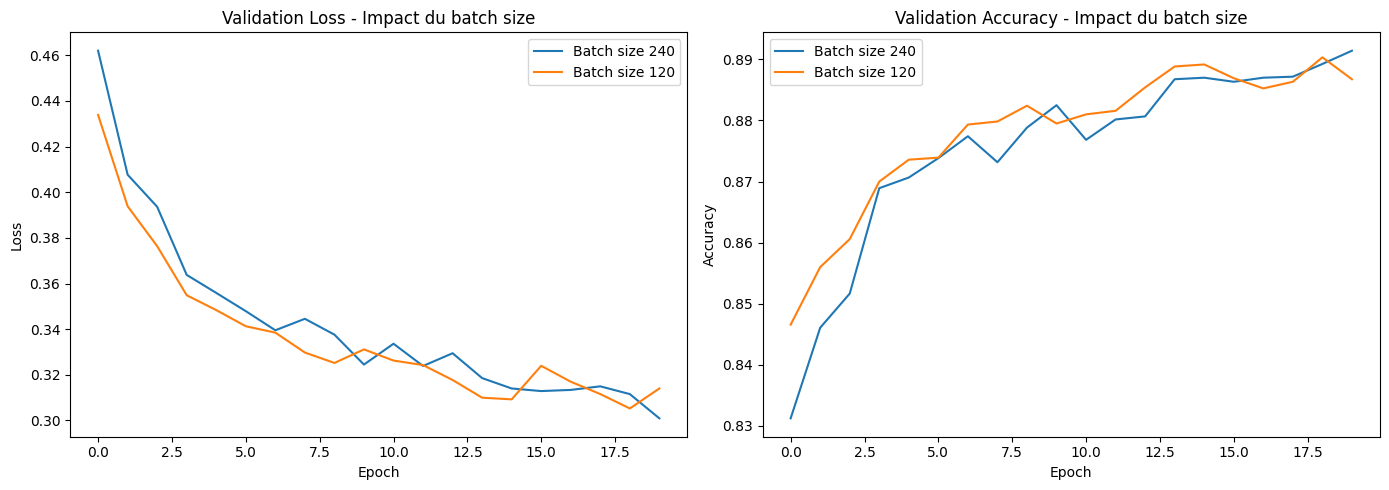

Model M (batch_size=240) - Test accuracy: 0.8836
Model M (batch_size=120) - Test accuracy: 0.8817


In [89]:
# Modèle M avec batch size réduit à 120
model_M_small_batch = Sequential([
    Input(shape=(28*28,)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model_M_small_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_M_small = model_M_small_batch.fit(X_train, y_train, epochs=20, batch_size=120, validation_split=0.2, verbose=1)

plt.figure(figsize=(14, 5))

# Comparaison des loss avec batch_size 240 vs 120
plt.subplot(1, 2, 1)
plt.plot(history_M.history['val_loss'], label='Batch size 240')
plt.plot(history_M_small.history['val_loss'], label='Batch size 120')
plt.title('Validation Loss - Impact du batch size')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Comparaison des accuracy avec batch_size 240 vs 120
plt.subplot(1, 2, 2)
plt.plot(history_M.history['val_accuracy'], label='Batch size 240')
plt.plot(history_M_small.history['val_accuracy'], label='Batch size 120')
plt.title('Validation Accuracy - Impact du batch size')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

test_loss_M_small, test_acc_M_small = model_M_small_batch.evaluate(X_test, y_test, verbose=0)
print("Model M (batch_size=240) - Test accuracy: {:.4f}".format(test_acc_M))
print("Model M (batch_size=120) - Test accuracy: {:.4f}".format(test_acc_M_small))

Si maintenant on utilise des fonctions d'activation de type sigmoïde ou elu sur les couches cachées, cela a-t-il un impact réel pour ce jeu de données.

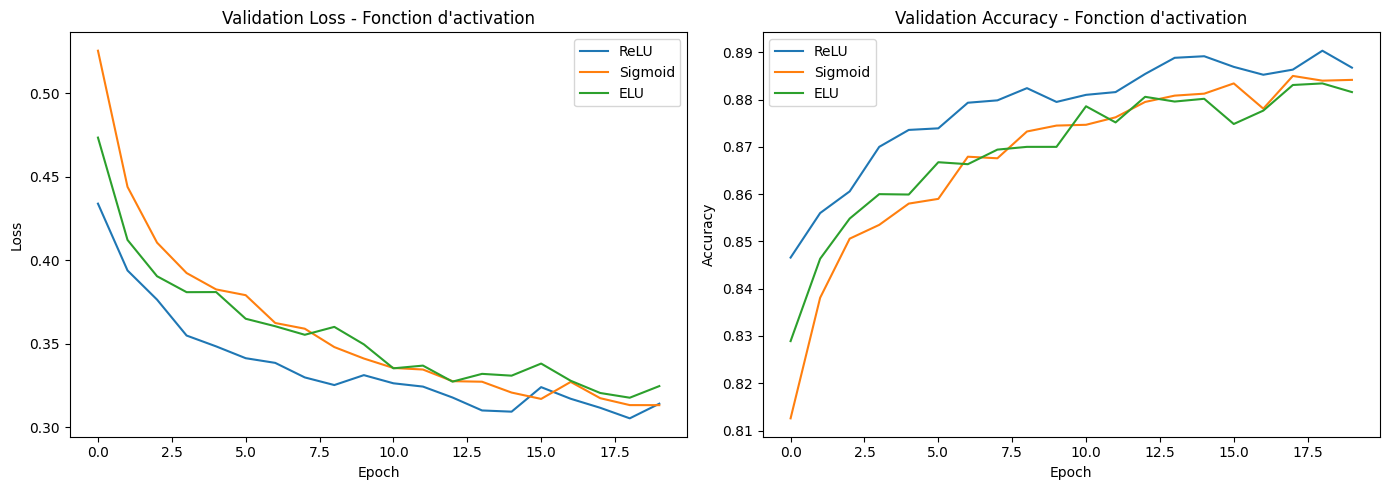

ReLU - Test accuracy: 0.8817
Sigmoid - Test accuracy: 0.8752
ELU - Test accuracy: 0.8720


In [90]:
# Modèle avec Sigmoid
model_sigmoid = Sequential([
    Input(shape=(28*28,)),
    Dense(256, activation='sigmoid'),
    Dropout(0.4),
    Dense(128, activation='sigmoid'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=20, batch_size=120, validation_split=0.2, verbose=0)

# Modèle avec ELU
model_elu = Sequential([
    Input(shape=(28*28,)),
    Dense(256, activation='elu'),
    Dropout(0.4),
    Dense(128, activation='elu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model_elu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_elu = model_elu.fit(X_train, y_train, epochs=20, batch_size=120, validation_split=0.2, verbose=0)

plt.figure(figsize=(14, 5))

# Validation loss
plt.subplot(1, 2, 1)
plt.plot(history_M_small.history['val_loss'], label='ReLU')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid')
plt.plot(history_elu.history['val_loss'], label='ELU')
plt.title('Validation Loss - Fonction d\'activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_M_small.history['val_accuracy'], label='ReLU')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_elu.history['val_accuracy'], label='ELU')
plt.title('Validation Accuracy - Fonction d\'activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Évaluation test
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)
test_loss_elu, test_acc_elu = model_elu.evaluate(X_test, y_test, verbose=0)

print("ReLU - Test accuracy: {:.4f}".format(test_acc_M_small))
print("Sigmoid - Test accuracy: {:.4f}".format(test_acc_sigmoid))
print("ELU - Test accuracy: {:.4f}".format(test_acc_elu))

Compte tenu de tous ces tests quel bilan peut-on faire pour sur les réseaux de neurones (en général) au regard du nombre de couche, du nombre de neurones par couche, du nombre d'epochs et de batchs.

## Résumé et Bilan sur les réseaux de neurones

**Nombre de couches:**
- Ajouter trop de couches n'améliore pas nécessairement les performances (3 couches vs 2 couches)
- Il existe un point optimal au-delà duquel on fait du surapprentissage

**Nombre de neurones par couche:**
- Diviser par deux le nombre de neurones (256→128) entraîne une légère dégradation
- Mais le modèle reste performant et s'entraîne plus rapidement

**Nombre d'epochs:**
- Trop d'epochs entraîne l'overfitting (la courbe de validation loss stagne ou augmente)
- Pour ce dataset, 10-15 epochs suffisent, 20 est un maximum

**Taille des batchs:**
- Réduire la taille des batchs (240→120) permet plus de mises à jour et généralement améliore la convergence
- Mais peut aussi introduire plus de bruit et rendre l'apprentissage moins stable

**Dropout:**
- Le dropout réduit l'écart entre train et validation, ce qui réduit l'overfitting
- Impact positif particulièrement visible après quelques epochs

**Fonction d'activation:**
- ReLU est la meilleure pour ce type de problème (apprentissage plus rapide)
- Sigmoid et ELU donnent des résultats similaires ou légèrement moins bons

## 4. Analyse des résultats sur la partie test

A partir du modèle M effectuer une prédiction sur les données de test. Évaluer les performances du modèle. Ces performances sont-elles cohérentes par rapport aux résultats obtenus sur la partie validation au cours du fit.

In [91]:
# Prédictions sur le test set
y_pred = model_M.predict(X_test, verbose=0)

# Évaluation des performances
test_loss, test_accuracy = model_M.evaluate(X_test, y_test, verbose=0)
print("Performances du modèle M sur le test set:")
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Comparaison avec la validation
print("\nComparaison avec la validation:")
print(f"Validation Loss (final): {history_M.history['val_loss'][-1]:.4f}")
print(f"Validation Accuracy (final): {history_M.history['val_accuracy'][-1]:.4f}")
print(f"\nL'accuracy du test est similaire à celle de la validation (pas de surapprentissage important)")

Performances du modèle M sur le test set:
Loss: 0.3278
Accuracy: 0.8836

Comparaison avec la validation:
Validation Loss (final): 0.3009
Validation Accuracy (final): 0.8914

L'accuracy du test est similaire à celle de la validation (pas de surapprentissage important)


Transformer les résultats de la prédiction, de type one-hot encoding, en une valeur, entre 0 et 9, correspondant au numéro de l'habit. Enregistrez les prédictions et les valeurs des sorties test en dataframe, pour faciliter les traitements ultérieurs.

In [92]:
# Transformer les prédictions one-hot en nombres
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Créer un dataframe
results_df = pd.DataFrame({
    'True': y_test_classes,
    'Predicted': y_pred_classes,
    'Correct': y_test_classes == y_pred_classes
})

print("Aperçu des résultats:")
print(results_df.head(20))
print(f"\nNombre d'erreurs: {(~results_df['Correct']).sum()}")
print(f"Nombre de bonnes prédictions: {results_df['Correct'].sum()}")

Aperçu des résultats:
    True  Predicted  Correct
0      9          9     True
1      2          2     True
2      1          1     True
3      1          1     True
4      6          6     True
5      1          1     True
6      4          4     True
7      6          6     True
8      5          5     True
9      7          7     True
10     4          4     True
11     5          5     True
12     7          7     True
13     3          3     True
14     4          4     True
15     1          1     True
16     2          2     True
17     4          2    False
18     8          8     True
19     0          0     True

Nombre d'erreurs: 1164
Nombre de bonnes prédictions: 8836


Affichez pour chacun des objets de la base de données le nombre d'erreurs commis. Quel est l'objet le plus mal identifié.

In [93]:
# Erreurs par classe
errors_per_class = []
for class_id in range(10):
    class_mask = y_test_classes == class_id
    errors = (~results_df[class_mask]['Correct']).sum()
    total = class_mask.sum()
    errors_per_class.append({
        'Classe': class_id,
        'Nom': labels_dict[class_id],
        'Erreurs': errors,
        'Total': total,
        'Taux d\'erreur': errors/total*100
    })

errors_df = pd.DataFrame(errors_per_class)
print(errors_df.to_string(index=False))

print(f"\nObjet le plus mal identifié: {errors_df.loc[errors_df['Erreurs'].idxmax(), 'Nom']} ({errors_df['Erreurs'].max()} erreurs)")

 Classe         Nom  Erreurs  Total  Taux d'erreur
      0 T-shirt/top      146   1000           14.6
      1     Trouser       31   1000            3.1
      2    Pullover      193   1000           19.3
      3       Dress       94   1000            9.4
      4        Coat      217   1000           21.7
      5      Sandal       45   1000            4.5
      6       Shirt      331   1000           33.1
      7     Sneaker       37   1000            3.7
      8         Bag       28   1000            2.8
      9  Ankle boot       42   1000            4.2

Objet le plus mal identifié: Shirt (331 erreurs)


Afficher via la fonction heatmap de la bibliothèque seaborn la matrice de confusion entre les valeurs de teste et de prédiction. Vous remplacerez les nombres des abscisses x et des ordonnées y par les noms des objets de la liste targets (T_shirt, …, Bottines).

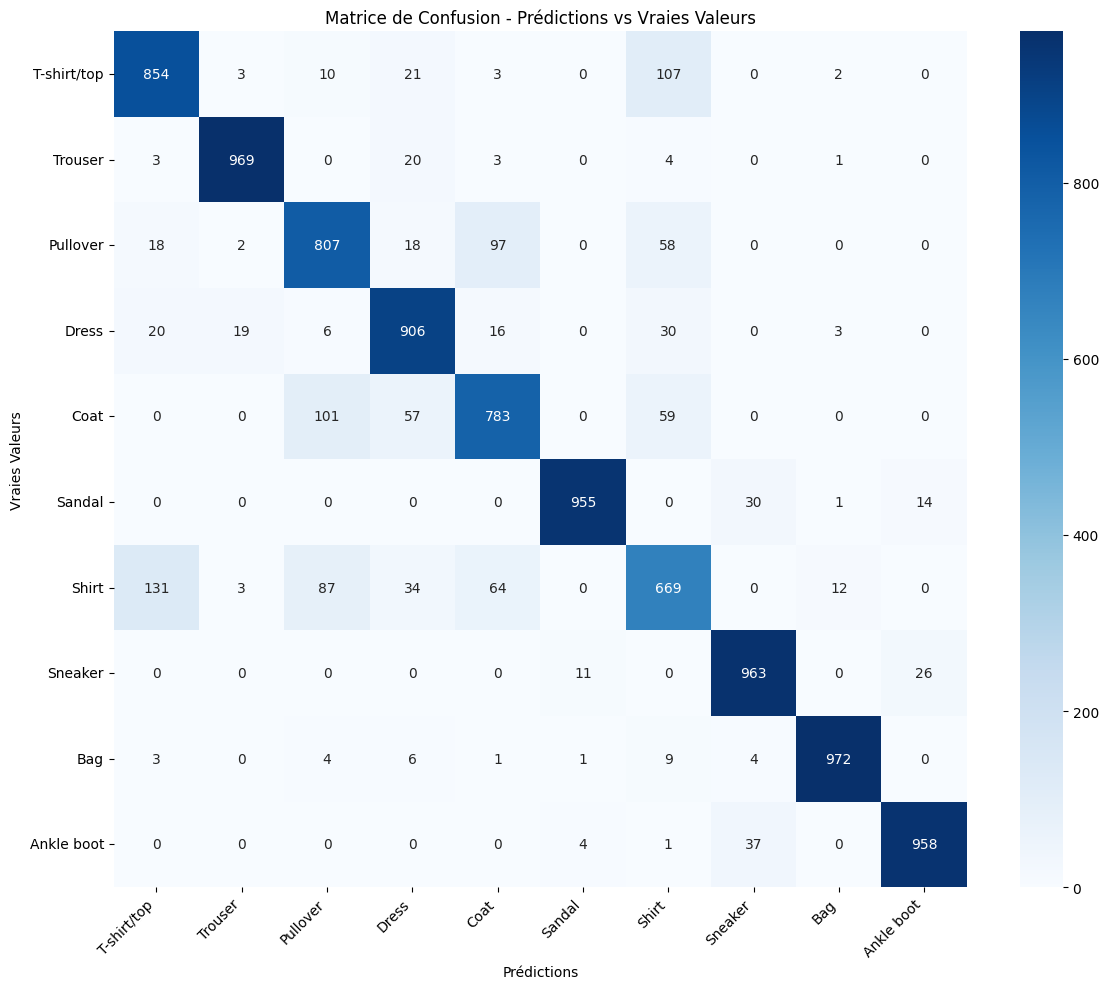

In [94]:
# Matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Créer un dataframe pour la heatmap avec les noms
labels_list = [labels_dict[i] for i in range(10)]
cm_df = pd.DataFrame(cm, index=labels_list, columns=labels_list)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=labels_list, yticklabels=labels_list)
plt.title('Matrice de Confusion - Prédictions vs Vraies Valeurs')
plt.ylabel('Vraies Valeurs')
plt.xlabel('Prédictions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Pour chemises classées en T-shirt affichez les 25 premières erreurs commises (5 images par 5). Ces affichages permettent-ils de comprendre les erreurs commises. Pensez-vous qu'en conservant la taille des images les résultats pourraient être améliorés.

Nombre de chemises (true=6) prédites comme T-shirt (pred=0): 131


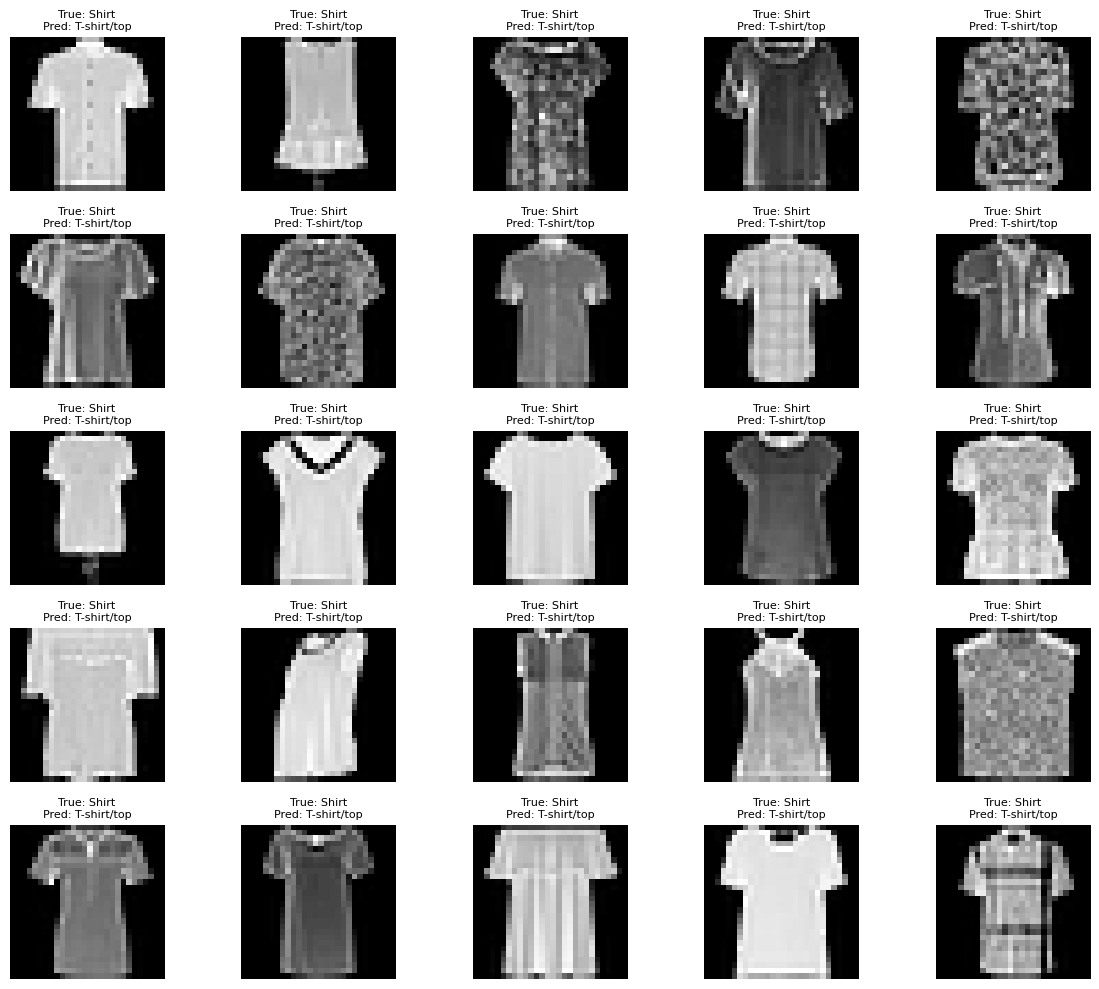


Observation: Les chemises et T-shirts se ressemblent beaucoup visuellement,
ce qui explique les confusions. Une résolution plus élevée pourrait aider à distinguer.


In [95]:
# Erreurs: Chemises (6) prédites comme T-shirt (0)
errors_shirt_to_tshirt = results_df[(results_df['True'] == 6) & (results_df['Predicted'] == 0)]
error_indices = errors_shirt_to_tshirt.index[:25]

print(f"Nombre de chemises (true=6) prédites comme T-shirt (pred=0): {len(errors_shirt_to_tshirt)}")

if len(error_indices) > 0:
    plt.figure(figsize=(12, 10))
    for i, idx in enumerate(error_indices[:25]):
        plt.subplot(5, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels_dict[y_test_classes[idx]]}\nPred: {labels_dict[y_pred_classes[idx]]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print("\nObservation: Les chemises et T-shirts se ressemblent beaucoup visuellement,")
    print("ce qui explique les confusions. Une résolution plus élevée pourrait aider à distinguer.")
else:
    print("Pas d'erreurs de ce type trouvées.")

Effectuer la même chose pour les bottines classées en sandales. Pensez-vous que les résultats du modèle pourraient être améliorés en conservant la taille des images.

Nombre de bottines (true=9) prédites comme sandales (pred=5): 4


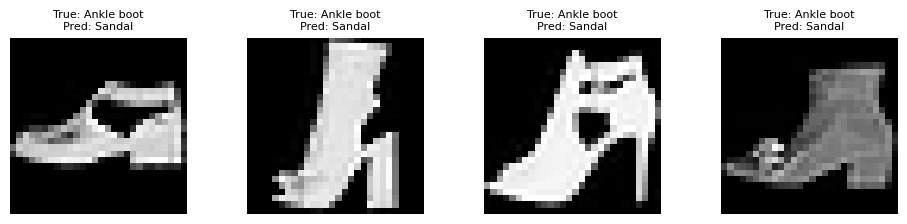


Observation: Les bottines et sandales ont des structures visuelles similaires,
particulièrement à basse résolution (28x28). Une résolution plus élevée permettrait
de mieux capturer les détails distinctifs (lacets, semelle, etc.)


In [96]:
# Erreurs: Bottines (9) prédites comme Sandales (5)
errors_boot_to_sandal = results_df[(results_df['True'] == 9) & (results_df['Predicted'] == 5)]
error_indices_boot = errors_boot_to_sandal.index[:25]

print(f"Nombre de bottines (true=9) prédites comme sandales (pred=5): {len(errors_boot_to_sandal)}")

if len(error_indices_boot) > 0:
    plt.figure(figsize=(12, 10))
    for i, idx in enumerate(error_indices_boot[:25]):
        plt.subplot(5, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels_dict[y_test_classes[idx]]}\nPred: {labels_dict[y_pred_classes[idx]]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print("\nObservation: Les bottines et sandales ont des structures visuelles similaires,")
    print("particulièrement à basse résolution (28x28). Une résolution plus élevée permettrait")
    print("de mieux capturer les détails distinctifs (lacets, semelle, etc.)")
else:
    print("Pas d'erreurs de ce type trouvées.")

In [97]:
# libérer les modèles : 
keras.backend.clear_session()
del model